<a href="https://colab.research.google.com/github/xzdil/dogorcat/blob/main/%D0%A1%D0%BE%D0%B1%D0%B0%D0%BA%D0%B0_%D0%B8%D0%BB%D0%B8_%D0%BA%D0%BE%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Рахимжанов Адиль


In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
from PIL import Image

In [ ]:
!pip3 install gdown
!gdown https://drive.google.com/uc?id=1TWjI7ucryVPGMpUMq8cdigYrtKQtc54t

Downloading...
From: https://drive.google.com/uc?id=1TWjI7ucryVPGMpUMq8cdigYrtKQtc54t
To: /content/kagglecatsanddogs_3367a.zip
100% 825M/825M [00:11<00:00, 71.0MB/s]


In [ ]:
!unzip kagglecatsanddogs_3367a.zip

In [ ]:
path = 'PetImages'
for folder in os.listdir(path):
    for img_file in os.listdir(os.path.join(path, folder)):
        img_file = os.path.join(path, folder, img_file)
        try:
            img = Image.open(img_file)
            if img.mode != 'RGB':
                os.remove(img_file)
        except:
            os.remove(img_file)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
transform = transforms.Compose([
                                transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5],[0.5])
                                ])

dataset = datasets.ImageFolder('PetImages', transform=transform)

dataset_len = len(dataset)
print(dataset_len)
train_len, test_len = dataset_len-6000, 6000
train_set, test_set = torch.utils.data.random_split(dataset, [train_len, test_len])
batch_size = 50

train_set = DataLoader(dataset=train_set, shuffle=True, batch_size=batch_size)
test_set = DataLoader(dataset=test_set, shuffle=True, batch_size=batch_size)

24931


In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        self.pool = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout(p=0.2)

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=4)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=4)
        self.conv3 = nn.Conv2d(in_channels=12, out_channels=14, kernel_size=4)
        self.conv4 = nn.Conv2d(in_channels=14, out_channels=16, kernel_size=4)
        self.conv5 = nn.Conv2d(in_channels=16, out_channels=20, kernel_size=4)  

        self.fc1 = nn.Linear(in_features=20*4*4, out_features=250)
        self.fc2 = nn.Linear(in_features=250, out_features=200)
        self.fc3 = nn.Linear(in_features=200, out_features=50)
        self.fc4 = nn.Linear(in_features=50, out_features=10)
        self.fc5 = nn.Linear(in_features=10, out_features=2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        
        x = x.reshape(-1, 20*4*4)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        x = self.fc5(x)
        return x

net = Model().to(device)
print(net)

Model(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv1): Conv2d(3, 6, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(12, 14, kernel_size=(4, 4), stride=(1, 1))
  (conv4): Conv2d(14, 16, kernel_size=(4, 4), stride=(1, 1))
  (conv5): Conv2d(16, 20, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=250, bias=True)
  (fc2): Linear(in_features=250, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=2, bias=True)
)


In [ ]:
# загрузить модель
with torch.no_grad():
    net = Model().to(device)
    net.load_state_dict(torch.load('cat_vs_dog.pt'))
    net.eval()
    
    total_correct = 0.0
    for inputs, labels in test_set:
      labels = labels.to(device)
      output = net(inputs.to(device))
      output_ind = torch.argmax(output, dim = 1)
      total_correct += sum(labels == output_ind)
    print(f'Accuracy: {(total_correct/test_len)*100}%')

Accuracy: 85.69999694824219%


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=1e-5)

In [ ]:
# обучение сети
net.train() 
for epoch in range(15):
  total_correct = 0.0
  running_loss = 0.0 
  for i, (inputs, labels) in enumerate(train_set):
      inputs, labels = inputs.to(device), labels.to(device)
      output = net(inputs)
      output_ind = torch.argmax(output, dim=1)
      total_correct += (labels == output_ind).sum().item()
      optimizer.zero_grad()
      loss = criterion(output, labels)
      running_loss += loss.item() * inputs.size(0)
      loss.backward()
      optimizer.step()
  print(f'Epoch: {epoch+1} Loss: {running_loss/train_len} Accuracy: {(total_correct/train_len)*100}%')
print('Finished training')

In [ ]:
# чекнуть аккуратность и loss
with torch.no_grad():
    net.eval()
    total_loss = 0.0
    total_correct = 0.0

    for inputs, labels in test_set:
      labels = labels.to(device)
      output = net(inputs.to(device))
      loss = criterion(output, labels)
      total_loss += loss.item() * inputs.size(0)
      output_ind = torch.argmax(output, dim = 1)
      total_correct += sum(labels == output_ind)
    print(f'Accuracy: {(total_correct/test_len)*100} Loss: {total_loss/test_len}')

Accuracy: 84.83332824707031 Loss: 0.3329163778573275


In [ ]:
torch.save(net.state_dict(),'cat_vs_dog.pt')

Подайте ссылку на картинку: https://memepedia.ru/wp-content/uploads/2018/07/cover-3-1.jpg
Загрузка...
tensor([[31.9817, 68.0183]], device='cuda:0', grad_fn=<MulBackward0>)


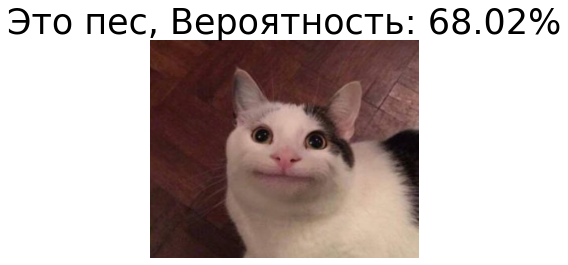

In [ ]:
#img = Image.open('photo_2021-10-31_20-07-42.jpg')
#img = Image.open('./cat.jpg')
import requests 
import io
import matplotlib.pyplot as plt

image_url = input('Подайте ссылку на картинку: ')

print('Загрузка...')

img = requests.get(image_url).content
img = Image.open(io.BytesIO(img))
plt.axis('off')
plt.imshow(img)

img = transform(img).unsqueeze(dim=0).to(device)
prediction = net(img)
out = torch.nn.functional.softmax(prediction, dim = 1)

def dog_or_cat(pred):
  if torch.argmax(pred) == 0:
    return('Это котяра')
  else:
    return('Это пес')

prob = torch.max(out).item() * 100
title = str(dog_or_cat(out)) + ", Вероятность: " + str(round(prob, 2)) + "%"
plt.title(title,fontsize = 35)
print(out * 100)
plt.show()